# Customer Churn Analysis
## Context
The leading telecom company has a massive market sharebut one big problem: several rivalsthat are constantly trying to steal customers.  Because this company has been the marketleader for so many years, there are not significantopportunities to grow with new customers.Instead, company executives have decided to focuson their churn: the rate at which they losecustomers.They have two teams especially interested in thisdata: the marketing team and the customerservice team.  Each team has its own reason for wantingthe analysis. The marketing teamwants to find out who the most likely people to churnare and create content that suits theirinterests.  The customer service team would like toproactively reach out to customers who areabout to churn, and try to encourage them to stay

# - Week 1 

## Importing packages


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
sns.set_palette('twilight_shifted')

## Loading the churn dataset

In [8]:
churn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

## Understanding the dataset

In [9]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Cleaning


In [11]:
churn['TotalCharges'].astype("float")


ValueError: could not convert string to float: ''

We will display where Total Charges have none values

In [12]:
churn[churn['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


#### The 11 clients shown here has 0 month subscribing to the company and none have churn. We can assume that they are new subscribers to the Telecom Company. 

### Replacing the none values with 0 and assigning to type float

In [13]:
churn['TotalCharges']=churn['TotalCharges'].replace({' ': 0})
churn['TotalCharges']= churn['TotalCharges'].astype('float')

In [14]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Exploratory Data Analysis 

In [15]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


* The mean of subscription month of a client in the company is about 32.37 months and 50 percent of the clients has been around for more than 29 months 
* On average , a client pays 64.76 dollars /month for a subscription . The minimum monthly charges is 18.25 dollars and 50 percent of the client pays more than 70.35 dollars
* A client of the company paid 8684.8 dollars in total charges  and 25 percent of the clients pays more than 3786.6 dollars in charges  

How many customers have churn ?

In [16]:
display(churn['Churn'].value_counts().to_frame())
print(r" They have been {0} customers that have churned".format(churn['Churn'].value_counts().to_frame().iloc[1,0]))

,Churn
No,5174
Yes,1869


 They have been 1869 customers that have churned


In [49]:
def plot_annotation(y_axis, ax, data, weight='bold', color='white', fontsize=14, figname='default'):
    total = len(data[y_axis])
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width()/2 # + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y), clip_on=True, weight=weight, color=color, fontsize=fontsize)

    

In [ ]:
churn[churn['Churn'] == 'Yes'].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,1869.000000,1869.000000,1869.000000,1869.000000
mean,0.254682,17.979133,74.441332,1531.796094
std,0.435799,19.531123,24.666053,1890.822994
min,0.000000,1.000000,18.850000,18.850000
25%,0.000000,2.000000,56.150000,134.500000
50%,0.000000,10.000000,79.650000,703.550000
75%,1.000000,29.000000,94.200000,2331.300000
max,1.000000,72.000000,118.350000,8684.800000


* The mean of subscription month of a client who has churn is about 18 months and 50 percent of these clients has been around for less than 10 months
* On average , a client pays 74.44 dollars /month for a subscription . The minimum monthly charges is 18.85 dollars and 50 percent of the client pays more than 79.65 dollars
* One of the clients that have churned paid 8684.8 dollars in total charges  and 25 percent of the clients pays more than 2331.3 dollars in charges 

In [26]:
len(churn[(churn['Churn'] == 'Yes') & (churn['gender'] =='Female' )])

939

In [29]:
x = 
x[0]

'Female'

## Exploring categorical variables

In [47]:

def plot_bar(y_axis,data, hue = None ,title=None, figsize=(7,5) , weight='bold', color='white', fontsize=14, figname='default' ):
    plt.style.use('ggplot')
    sns.set(style="ticks", color_codes=True)
    fig, axes = plt.subplots(figsize = figsize)
    ax = sns.countplot(y=y_axis, data=data, hue=hue)
    ax.set_title(title)
    plot_annotation(y_axis, ax, data, weight, color, fontsize, figname)

In [102]:
def my_proportion(data  = churn, columns = None, rows = None,values =churn.gender.unique() , significance_level = 0.05) :
    counts = [len(churn[(data[columns] == 'Yes') & (churn[rows] == values[0])]),len(churn[( data[columns]== 'Yes') & (data[rows] == values[1] )])]
    nobs = [len(data[data[rows]== values[0]]),len(data[data[rows]== values[1]])]
    stat, pval = proportions_ztest(counts, nobs)
    print('{0:0.3f}'.format(pval))
    if pval <= significance_level: 
        print('Reject NULL HYPOTHESIS : There is a significant difference between the two groups') 
    else: 
        print('ACCEPT NULL HYPOTHESIS : There"s no significant diference between the two groups') 

In [103]:
from statsmodels.stats.proportion import proportions_ztest
my_proportion(data  =churn , columns = 'Churn',rows = 'gender',values=churn.gender.unique(),significance_level = 0.05)
my_proportion(data  =churn , columns = 'Churn',rows = 'SeniorCitizen',values=churn.SeniorCitizen.unique(),significance_level = 0.05)
my_proportion(data = churn, columns ='Churn', rows = 'Partner', values = churn.Partner.unique(), significance_level = 0.05  )


0.470
ACCEPT NULL HYPOTHESIS : There"s no significant diference between the two groups
0.000
Reject NULL HYPOTHESIS : There is a significant difference between the two groups
0.000
Reject NULL HYPOTHESIS : There is a significant difference between the two groups


### How much is churn affecting the business?

In [ ]:
revenue_status= churn[['Churn', 'MonthlyCharges']].groupby(['Churn']).sum()
revenue_status 


,MonthlyCharges
Churn,
No,316985.75
Yes,139130.85


In [ ]:
revenue_percent = revenue_status/revenue_status.sum()
display(revenue_percent)
print(r'Based on the customers dataset, the customers that have churned represented about {} dollars ({}%) of the total revenue of the company.'.format(np.round(revenue_status.iloc[1,0],2)
,np.round(revenue_percent.iloc[1,0]*100,2) ))


,MonthlyCharges
Churn,
No,0.694966
Yes,0.305034


Based on the customers dataset, the customers that have churned represented about 139130.85 dollars (30.5%) of the total revenue of the company.


In [ ]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [58]:
gender_Tab = pd.crosstab(churn['gender'],churn.Churn, values = churn.customerID ,aggfunc  ='count' ,normalize= 'index')
Senior_Tab = pd.crosstab(churn['SeniorCitizen'],churn.Churn, values = churn.customerID ,aggfunc  ='count' ,normalize= 'index')
Partners_Tab = pd.crosstab(churn['Partner'],churn.Churn, values = churn.customerID ,aggfunc  ='count' ,normalize= 'index')
Dependents_Tab = pd.crosstab(churn['Dependents'],churn.Churn, values = churn.customerID ,aggfunc  ='count' ,normalize= 'index')
PhoneService_Tab = pd.crosstab(churn['PhoneService'],churn.Churn, values = churn.customerID ,aggfunc  ='count' ,normalize= 'index')
multipleline_Tab = pd.crosstab(churn['MultipleLines'],churn.Churn, values = churn.customerID ,aggfunc  ='count' ,normalize= 'index')
PhoneService_Tab = pd.crosstab(churn['PhoneService'],churn.Churn, values = churn.customerID ,aggfunc  ='count' ,normalize= 'index')
Internet_tab = pd.crosstab(churn['InternetService'],churn.Churn, values = churn.customerID ,aggfunc  ='count' ,normalize= 'index')
Streaming_tab = pd.crosstab(churn['StreamingMovies'],churn.Churn, values = churn.customerID ,aggfunc  ='count' ,normalize= 'index')

In [88]:
gender_Tab
            
            

Churn,No,Yes
gender,,
Female,0.730791,0.269209
Male,0.738397,0.261603


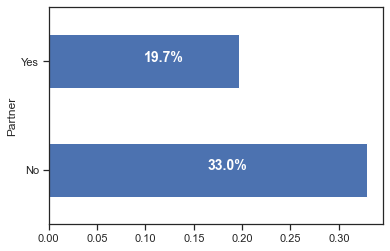

In [93]:
bar_plot1(Partners_Tab)

In [61]:
def bar_plot1(data) :
    ax  = data['Yes'].plot.barh()
    total = len(data['Yes'])

    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width())
            x = p.get_x() + p.get_width()/2 # + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y), clip_on=True, weight='bold', color='white', fontsize=14)
            plt.style.use('ggplot')
            

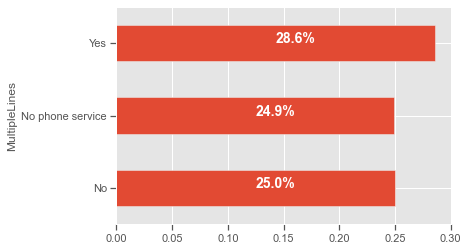

In [94]:
bar_plot1(multipleline_Tab)

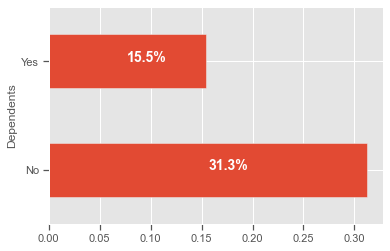

In [ ]:
bar_plot1(Dependents_Tab)

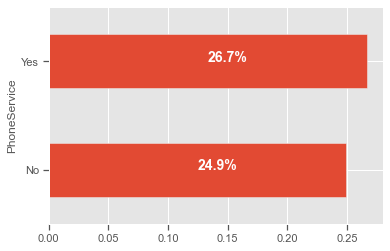

In [ ]:
bar_plot1(PhoneService_Tab)

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

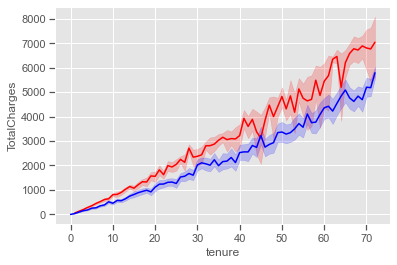

In [100]:
sns.lineplot(y = churn.TotalCharges[churn.Churn == 'Yes'], x = churn.tenure[churn.Churn == 'Yes'],data = churn,color = 'red' )
sns.lineplot(y = churn.TotalCharges[churn.Churn == 'No'], x = churn.tenure[churn.Churn == 'No'],data = churn,color = 'blue' )

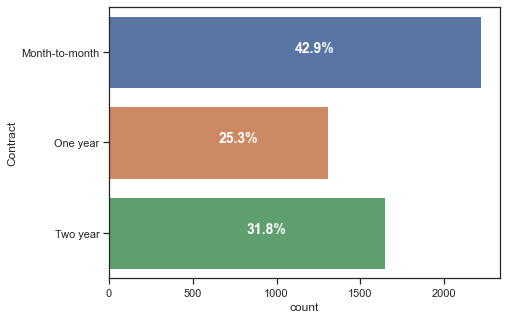

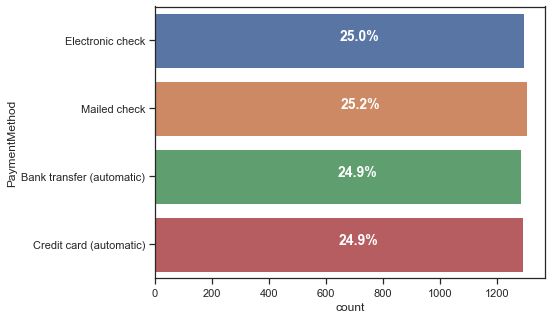

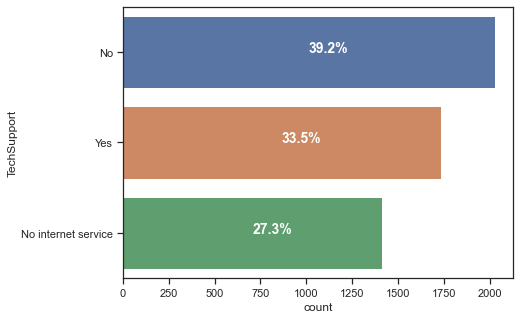

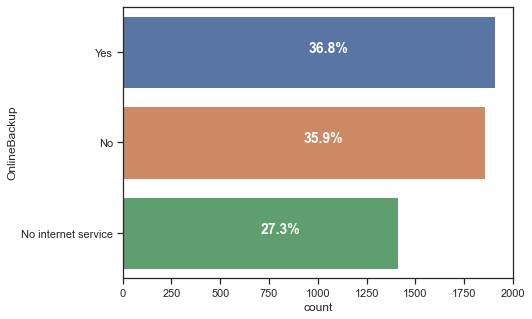

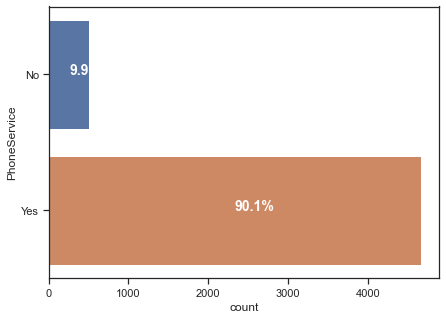

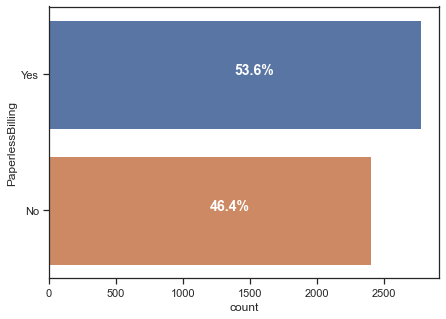

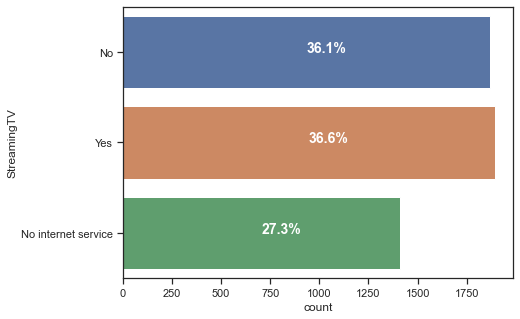

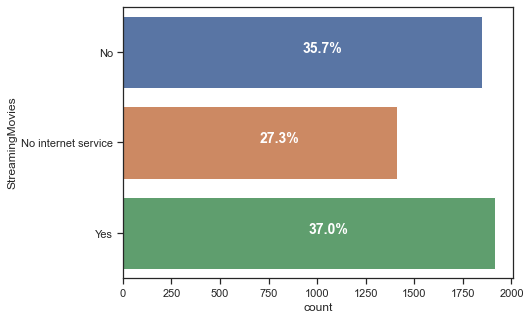

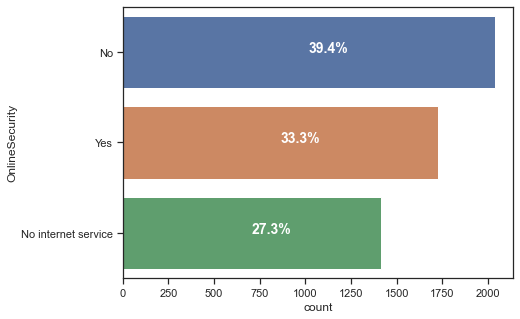

In [101]:
plot_bar("Contract", data=churn[churn['Churn'] == 'No'])
plot_bar("PaymentMethod", data=churn[churn['Churn'] == 'No'])
plot_bar("TechSupport", data=churn[churn['Churn'] == 'No'])
plot_bar("OnlineBackup", data=churn[churn['Churn'] == 'No'])
plot_bar("PhoneService", data=churn[churn['Churn'] == 'No'])
plot_bar("PaperlessBilling", data=churn[churn['Churn'] == 'No'])
plot_bar("StreamingTV", data=churn[churn['Churn'] == 'No'])
plot_bar("StreamingMovies", data=churn[churn['Churn'] == 'No'])
plot_bar("OnlineSecurity", data=churn[churn['Churn'] == 'No'])

In [ ]:
churn1 = churn.drop(columns = ['customerID'])

In [ ]:
categorical_cols = [c for c in churn1.columns if churn1[c].dtype == 'object'
                    or c == 'SeniorCitizen']
churn1_categorical = churn1[categorical_cols].copy()
for col in categorical_cols:
    if churn1[col].nunique() == 2:
        churn1[col], _ = pd.factorize(churn1[col])
    else:
        churn1 = pd.get_dummies(churn1, columns=[col])

In [ ]:
redundant_columns=churn1.columns[churn1.columns.str.contains('No internet service')].tolist()

In [ ]:


churn1.drop(columns=redundant_columns,inplace=True)

In [ ]:
churn1 = churn1.drop(columns = ['MultipleLines_No phone service','MultipleLines_No','OnlineSecurity_No','OnlineBackup_No'\
                       ,'DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'])

In [ ]:
churn1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,0,1,0,0,29.85,29.85,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,1,0,34,1,1,56.95,1889.50,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,1,0,2,1,0,53.85,108.15,1,...,0,0,0,1,0,0,0,0,0,1
3,1,0,1,0,45,0,1,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,1,0,2,1,0,70.70,151.65,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,1,24,1,0,84.80,1990.50,0,...,1,1,1,0,1,0,0,0,0,1
7039,0,0,0,1,72,1,0,103.20,7362.90,0,...,0,1,1,0,1,0,0,1,0,0
7040,0,0,0,1,11,0,0,29.60,346.45,0,...,0,0,0,1,0,0,0,0,1,0
7041,1,1,0,0,4,1,0,74.40,306.60,1,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
kn =  pd.pivot_table(churn,index= 'gender', columns= 'Churn', values='tenure' ,aggfunc='mean')
kn

Churn,No,Yes
gender,,
Female,37.858768,17.004260
Male,37.289524,18.963441
